In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import cv2
import os, glob, shutil

In [2]:
input_dir='D:/New folder/test'
glob_dir=input_dir+'/*.JPG'
images=[cv2.resize(cv2.imread(file),(224,224)) for file in glob.glob(glob_dir)] # Load the whole 2771 images and resizing to (224,224)
paths= [file for file in glob.glob(glob_dir)]
images = np.array(np.float32(images).reshape(len(images),-1)/255) #converting it into  numpy array and shaping it to 0-1


In [3]:
model=tf.keras.applications.MobileNetV2(include_top=False,
weights='imagenet', input_shape=(224,224,3))               #Using MobilNetV2 for feature extraction
predictions= model.predict(images.reshape(-1,224,224,3))
pred_images= predictions.reshape(images.shape[0],-1)

In [4]:
k=10                                                          #Using K-means for clustering of images
kmodel = KMeans(n_clusters = k, n_jobs=-1, random_state=728)
kmodel.fit(pred_images)
kpredictions = kmodel.predict(pred_images)
shutil.rmtree('D:/New Folder/output')
for i in range(k):
    os.makedirs("D:/New Folder/output/cluster" + str(i))            #creating the new clustered images in a directory
for i in range(len(paths)):
    shutil.copy2(paths[i], "D:/New Folder/output/cluster"+str(kpredictions[i]))

In [5]:
sil = []                                                              #Using Silhoette score for prediction of accurate K value
kl = []
kmax = 11
for k in range(2, kmax+1):
    kmeans2 = KMeans(n_clusters = k).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images, labels, metric ='euclidean'))
    kl.append(k)

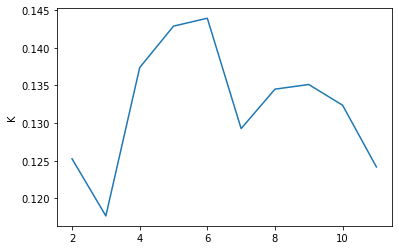

In [6]:
plt.plot(kl, sil)                                                       #Ploting the Silhoette score
plt.ylabel('Silhoutte Score')
plt.ylabel('K')
plt.show()